## 9. Machine Learning to predict clothing prices

https://www.data-to-viz.com/

https://github.com/cristianpjensen/stock-market-prediction-via-google-trends#data_collection
https://github.com/le0x99/DailyTrends  

### 0. Import modules and load data

In [1]:
# data manipualtion and basics
import pandas as pd
import numpy as np
import time
from datetime import date


import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# For plotting
import seaborn as sns  # esta basada en matplotlib
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

%matplotlib inline

## my own functions
from src import dataanalysis_fun1 as eda # Import my module


In [2]:
# machine learning

from sklearn.preprocessing import LabelEncoder  

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import BayesianRidge

from sklearn.svm import SVR 

from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA  

In [3]:
ML_models_short = {
    "linear_regression": LinearRegression(),
    "ridge_regression": Ridge(),
    "lasso_regression": Lasso(),
    "decision_tree_regressor": DecisionTreeRegressor(),
    "random_forest_regressor": RandomForestRegressor(),
    "gradient_boosting_regressor": GradientBoostingRegressor(),
    "svr_rbf": SVR(kernel = "rbf"),
    "svr_linear": SVR(kernel = "linear"),
    "knn_regressor": KNeighborsRegressor(),
    "mlp_regressor": MLPRegressor(),
    "bayesian_ridge": BayesianRidge()

}


def ML_fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits the given machine learning models to the training data and evaluates their performance on the test data.    Parameters:
    - models (dict): A dictionary where keys are model names and values are the corresponding machine learning models.
    - X_train (array-like): Feature matrix of the training set.
    - X_test (array-like): Feature matrix of the test set.
    - y_train (array-like): True labels of the training set.
    - y_test (array-like): True labels of the test set.   
    Returns:
    dict: A dictionary where keys are model names and values are their corresponding accuracy scores on the test set.    
    This function takes a dictionary of machine learning models and fits each model to the training data.
    It then evaluates the performance of each model on the provided test data using the `score` method,
    and returns a dictionary of model names and their corresponding accuracy scores.
    """
    #model_scores = {}
    model_rmse = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
 
        # Calculate RMSE from the mean of y_test
        baseline_predictions = np.full_like(y_test, y_test.mean())  # Create an array with mean values
        baseline_rmse = round(mean_squared_error(y_test, baseline_predictions, squared=False), ndigits=2)


        # Calculate RMSE from your model's predictions
        model_rmse = round(mean_squared_error(y_test, y_pred, squared=False), ndigits=2)

        # Calculate the model's score (if applicable)
        model_score = round(model.score(X_test, y_test), 2)  # Assuming 'model' is your trained model

        # Create a dictionary to store the metrics
        metrics = {
            'Model Score': model_score,
            'Model RMSE': model_rmse,
            'Baseline RMSE': baseline_rmse
        }


    return metrics

In [4]:
def ML_fit_and_score(models, X_train, X_test, y_train, y_test):
    model_metrics = {}  # Dictionary to store metrics for each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate RMSE from the mean of y_test
        baseline_predictions = np.full_like(y_test, y_test.mean())
        baseline_rmse = round(mean_squared_error(y_test, baseline_predictions, squared=False), ndigits=2)

        # Calculate RMSE from your model's predictions
        model_rmse = round(mean_squared_error(y_test, y_pred, squared=False), ndigits=2)

        # Calculate the model's score (if applicable)
        model_score = round(model.score(X_test, y_test), 2)

        # Store metrics in a dictionary for each model
        model_metrics[name] = {
            'Model Score': model_score,
            'Model RMSE': model_rmse,
            'Baseline RMSE': baseline_rmse
        }

    return model_metrics

### 0. Load dataset for machine learning

In [5]:
#clothes_dum=pd.read_csv("../data/clean/clothes_dum.csv")
clothes_sim=pd.read_csv("../data/clean/clothes_simple.csv")
#clothes_comp=pd.read_csv("../data/clean/clothes_complete.csv")

#### Assign colors to catgories

In [11]:
## COLOR CODES MATCH THE COLOR LABEL
colors_dict = {
    'brown': '#800000',
    'red': '#FF0000',
    'yellow': '#FFFF00',
    'blue': '#0000FF',
    'beige': '#F5F5DC',
    'white': '#FFFFFF',
    'gray': '#808080',
    'purple': '#800080',
    'multicolor': '#FF00FF',  # Specifying a different color for 'multicolor'
    'orange': '#FFA500',
    'black': '#000000',
    'pink': '#FFC0CB',
    'green': '#008000',
    'turquoise': '#40E0D0',
    'gold': '#FFD700'
}

types_dict = {
    'sweater': '#FF0000',
    'sweatshirt': '#0000FF',
    'top': '#808080',
    'dress': '#FFA500',
    'tshirt': '#000000',
    'shirt': '#008000'
}

class_dict = {"low": "grey", "middle": "orange", "high":"red"}

# Map color labels to their respective color codes
clothes_sim['colour_colorcode'] = clothes_sim['colour'].map(colors_dict)
clothes_sim['type_colorcode'] = clothes_sim['type'].map(types_dict)
clothes_sim['class_colorcode'] = clothes_sim['brand_class'].map(class_dict)

##

clothes_comp['colour_colorcode'] = clothes_comp['colour'].map(colors_dict)
clothes_comp['type_colorcode'] = clothes_comp['type'].map(types_dict)
clothes_comp['class_colorcode'] = clothes_comp['brand_class'].map(class_dict)


In [12]:
types_list=list(types_dict.keys())
type_df=clothes_sim[clothes_sim["type"]==types_list[0]]

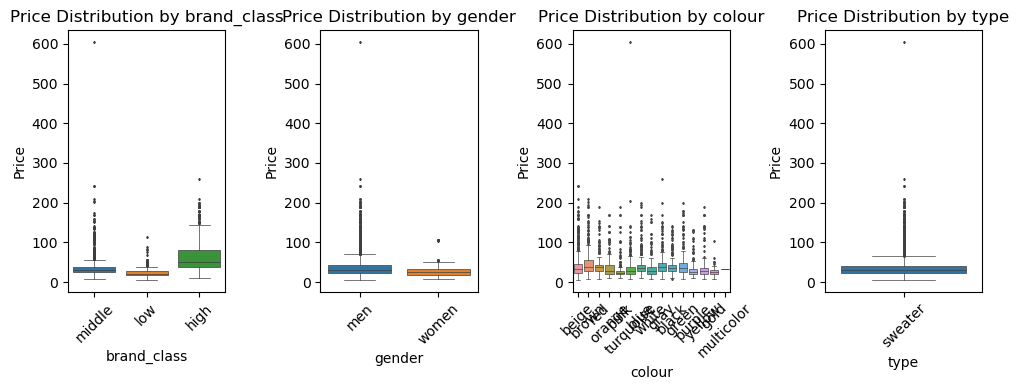

In [13]:
df=type_df
categorical_columns = ['brand_class', 'gender', 'colour', 'type']

fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # 1 row, 2 columns for side-by-side plots

for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='price_pack', data=df, ax=axes[i], fliersize=1, linewidth=0.5)
    axes[i].set_title(f'Price Distribution by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### General pipeline to find the best ML predictor model

   * One hot encoding - Dummy variables <br/>
    
* Divide X and y

    * Using all types together or not <br/>
    * Incuding or excluding outliers <br/>
    * With our without PCA <br/>

* Divide train/test set

* Evaluate multiple supervised models
* Select the best (highest) R2
* Fit/Predict on the data - Eval the RMSE

In [8]:
def var_to_dum(df_dum, dum_vars):
    
    for col_dum in dum_vars:
        dummies_temp = pd.get_dummies(df_dum[col_dum], drop_first=False)
        df_dum = pd.concat([df_dum, dummies_temp], axis=1) # Concatenate the dummies 
        df_dum.drop(col_dum, axis=1, inplace=True) # Drop the original column 
    
    return df_dum

## Try 1. Eval each clothing type separately, use brands classes - including potential outliers

In [33]:
types_list=list(types_dict.keys())

models_sumdf=pd.DataFrame()

for typ in types_list:
    
    type_df=clothes_sim[clothes_sim["type"]==typ]
    type_df=type_df.iloc[:, [1,2,3,5]]
    
    ### One-Hot encoding - dummy variables
    
    df_dum = type_df[["gender", "colour", "brand_class", "price_pack"]]
    dum_vars=["gender", "colour", "brand_class"]

    df_dum=var_to_dum(df_dum, dum_vars)

    ### X/y, 
    
    indep_var="price_pack"
    X = df_dum.drop([indep_var], axis=1)
    y = df_dum[indep_var]   
    
    ### without PCA
    ### Train/Test
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    ### construct models - w/o PCA
    type_models1=ML_fit_and_score(ML_models_short, X_train, X_test, y_train, y_test)
    
    models_sumdf1=pd.DataFrame(type_models1.values()).T
    models_sumdf1["type"]=typ
    models_sumdf1["PCA"]=0
    
    ### with PCA
    
    pca = PCA()
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    # to select # PC's: index at which the %variance explained > 0.7
    cutoff =0.7
    num_PC=len(np.cumsum(thefit_pca.explained_variance_ratio_)) - sum(np.cumsum(thefit_pca.explained_variance_ratio_)>=cutoff)
    
    ### PCA with optimal number of PC's
    pca = PCA(n_components=num_PC)
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    X_PCs = pd.DataFrame(thefit_pca.transform(X)) # transformation of the data into principal components 
    
    ### Train/Test
    X_train, X_test, y_train, y_test = tts(X_PCs, y, test_size=0.2, random_state=42)
    
    ### construct models - with PCA
    type_models1=ML_fit_and_score(ML_models_short, X_train, X_test, y_train, y_test)
    
    models_sumdf2=pd.DataFrame(type_models1.values()).T
    models_sumdf2["type"]=typ
    models_sumdf2["PCA"]=num_PC

    models_sumdf0=pd.concat([models_sumdf1, models_sumdf2], axis=0)
    models_sumdf=models_sumdf.append(models_sumdf0)
    
models_sumdf_try1=models_sumdf
models_sumdf_try1["outlier"]="including"

## Try 2. Eval each clothing type separately, use brands classes 
Excluding outliers >4 Z score

In [34]:
types_list=list(types_dict.keys())

models_sumdf=pd.DataFrame()

for typ in types_list:
    
    type_df=clothes_sim[clothes_sim["type"]==typ]
    type_df=type_df.iloc[:, [1,2,3,5]]
    
    # Exclude outliers 
    
    data=type_df["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 4 # Define a threshold (4 standard deviations)
    outliers = np.abs(z_scores) > threshold
    type_df=type_df[np.abs(z_scores) < threshold] # Exclude outliers
    
    ### One-Hot encoding - dummy variables
    
    df_dum = type_df[["gender", "colour", "brand_class", "price_pack"]]
    dum_vars=["gender", "colour", "brand_class"]

    df_dum=var_to_dum(df_dum, dum_vars)

    ### X/y, 
    
    indep_var="price_pack"
    X = df_dum.drop([indep_var], axis=1)
    y = df_dum[indep_var]   
    
    ### without PCA
    ### Train/Test
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    ### construct models - w/o PCA
    type_models1=ML_fit_and_score(ML_models_short,  X_train, X_test, y_train, y_test)
    
    models_sumdf1=pd.DataFrame(type_models1.values()).T
    models_sumdf1["type"]=typ
    models_sumdf1["PCA"]=0
    
    
    ### with PCA
    
    pca = PCA()
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    # to select # PC's: index at which the %variance explained > 0.7
    cutoff =0.7
    num_PC=len(np.cumsum(thefit_pca.explained_variance_ratio_)) - sum(np.cumsum(thefit_pca.explained_variance_ratio_)>=cutoff)
    
    ### PCA with optimal number of PC's
    pca = PCA(n_components=num_PC)
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    X_PCs = pd.DataFrame(thefit_pca.transform(X)) # transformation of the data into principal components 
    
    ### Train/Test
    X_train, X_test, y_train, y_test = tts(X_PCs, y, test_size=0.2, random_state=42)
    
    ### construct models - with PCA
    type_models1=ML_fit_and_score(ML_models_short,  X_train, X_test, y_train, y_test)
    
    models_sumdf2=pd.DataFrame(type_models1.values()).T
    models_sumdf2["type"]=typ
    models_sumdf2["PCA"]=num_PC

    models_sumdf0=pd.concat([models_sumdf1, models_sumdf2], axis=0)
    models_sumdf=models_sumdf.append(models_sumdf0)
    
models_sumdf_try2=models_sumdf
models_sumdf_try2["outlier"]="excluding4"

## Try 3. Eval each clothing type separately, use brands classes 
Excluding outliers >3 Z score

In [35]:
types_list=list(types_dict.keys())

models_sumdf=pd.DataFrame()

for typ in types_list:
    
    type_df=clothes_sim[clothes_sim["type"]==typ]
    type_df=type_df.iloc[:, [1,2,3,5]]
    
    # Exclude outliers 
    
    data=type_df["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 3 # Define a threshold (X standard deviations)
    outliers = np.abs(z_scores) > threshold
    type_df=type_df[np.abs(z_scores) < threshold] # Exclude outliers
    
    ### One-Hot encoding - dummy variables
    
    df_dum = type_df[["gender", "colour", "brand_class", "price_pack"]]
    dum_vars=["gender", "colour", "brand_class"]

    df_dum=var_to_dum(df_dum, dum_vars)

    ### X/y, 
    
    indep_var="price_pack"
    X = df_dum.drop([indep_var], axis=1)
    y = df_dum[indep_var]   
    
    ### without PCA
    ### Train/Test
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    ### construct models - w/o PCA
    type_models1=ML_fit_and_score(ML_models_short,  X_train, X_test, y_train, y_test)
    
    models_sumdf1=pd.DataFrame(type_models1.values()).T
    models_sumdf1["type"]=typ
    models_sumdf1["PCA"]=0
    
    
    ### with PCA
    
    pca = PCA()
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    # to select # PC's: index at which the %variance explained > 0.7
    cutoff =0.7
    num_PC=len(np.cumsum(thefit_pca.explained_variance_ratio_)) - sum(np.cumsum(thefit_pca.explained_variance_ratio_)>=cutoff)
    
    ### PCA with optimal number of PC's
    pca = PCA(n_components=num_PC)
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    X_PCs = pd.DataFrame(thefit_pca.transform(X)) # transformation of the data into principal components 
    
    ### Train/Test
    X_train, X_test, y_train, y_test = tts(X_PCs, y, test_size=0.2, random_state=42)
    
    ### construct models - with PCA
    type_models1=ML_fit_and_score(ML_models_short,  X_train, X_test, y_train, y_test)
    
    models_sumdf2=pd.DataFrame(type_models1.values()).T
    models_sumdf2["type"]=typ
    models_sumdf2["PCA"]=num_PC

    models_sumdf0=pd.concat([models_sumdf1, models_sumdf2], axis=0)
    models_sumdf=models_sumdf.append(models_sumdf0)
    
models_sumdf_try3=models_sumdf
models_sumdf_try3["outlier"]="excluding3"

## Try 4. Eval all clothing types together, use brands classes 
Excluding outliers >3 Z score

In [36]:
types_list=list(types_dict.keys())

models_sumdf=pd.DataFrame()

for i in range(1): # to to avoid the re-indexing
    
    type_df=clothes_sim
    type_df=type_df.iloc[:, [1,2,3,4,5]]
    
    # Exclude outliers 
    
    data=type_df["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 3 # Define a threshold (X standard deviations)
    outliers = np.abs(z_scores) > threshold
    type_df=type_df[np.abs(z_scores) < threshold] # Exclude outliers
    
    ### One-Hot encoding - dummy variables
    
    df_dum = type_df[["gender", "type", "colour", "brand_class", "price_pack"]]
    dum_vars=["gender","type", "colour", "brand_class"]

    df_dum=var_to_dum(df_dum, dum_vars)

    ### X/y, 
    
    indep_var="price_pack"
    X = df_dum.drop([indep_var], axis=1)
    y = df_dum[indep_var]   
    
    ### without PCA
    ### Train/Test
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    ### construct models - w/o PCA
    type_models1=ML_fit_and_score(ML_models_short,  X_train, X_test, y_train, y_test)
    
    models_sumdf1=pd.DataFrame(type_models1.values()).T
    models_sumdf1["type"]="all"
    models_sumdf1["PCA"]=0    
    
    ### with PCA
    
    pca = PCA()
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    # to select # PC's: index at which the %variance explained > 0.7
    cutoff =0.7
    num_PC=len(np.cumsum(thefit_pca.explained_variance_ratio_)) - sum(np.cumsum(thefit_pca.explained_variance_ratio_)>=cutoff)
    
    ### PCA with optimal number of PC's
    pca = PCA(n_components=num_PC)
    thefit_pca = pca.fit(X) # fitting of the PCA model 
    X_PCs = pd.DataFrame(thefit_pca.transform(X)) # transformation of the data into principal components 
    
    ### Train/Test
    X_train, X_test, y_train, y_test = tts(X_PCs, y, test_size=0.2, random_state=42)
    
    ### construct models - with PCA
    type_models1=ML_fit_and_score(ML_models_short, X_train, X_test, y_train, y_test)
    
    models_sumdf2=pd.DataFrame(type_models1.values()).T
    models_sumdf2["type"]="all"
    models_sumdf2["PCA"]=num_PC

    models_sumdf0=pd.concat([models_sumdf1, models_sumdf2], axis=0)
    models_sumdf=models_sumdf.append(models_sumdf0)

    
models_sumdf_try4=models_sumdf
models_sumdf_try4["outlier"]="excluding3"

### Concat the 38 types of models we constructed and then filter the best models

Overall, Best models:
* did not used PC's,<br/>
* excluded outliers defined above 3 times standard deviation
* mlp_regressor and gradient_boosting_regressor

In [37]:
models_sumdf_try1234=pd.concat([models_sumdf_try1, models_sumdf_try2, models_sumdf_try3, models_sumdf_try4], axis=0)
models_sumdf_try1234.columns=["R2", "model_RMSE", "base_RMSE", "type", "PCA", "outlier"]

In [40]:
TOPmodels_sumdf_try1234=pd.DataFrame()

for typ in types_list + ["all"]:
    temp=models_sumdf_try1234[models_sumdf_try1234["type"]==typ].sort_values("model_RMSE", ascending=True)
    TOPmodels_sumdf_try1234=TOPmodels_sumdf_try1234.append(temp.iloc[:2])


## Eval the model perfomance by comparing error metrics

* Calculate Model's Error Metrics: Compute MAE, MSE, and RMSE for the **model's predictions**. <br/>
* Calculate Errors Against the Mean: Calculate MAE, MSE, and RMSE using **the mean value** as predictions.<br/>

This allows you to **assess how well the model performs compared to simply using the mean as a prediction**. Lower error metrics indicate better model performance compared to using the mean value alone for prediction. <br/>

If the model's error metrics (MAE, MSE, RMSE) are consistently lower than the errors against the mean, it suggests that the model outperforms a naive model that always predicts the mean value.


#### All the models retrieved better predictions than just calculating the product average price

* For the exception `sweatshirt`, the model including `all types of clothing` together returned better predictions. <br/>

* The model not using PCA and using 7 PC's returned similar outcomes thus, for simplicity use the `mlp_regressor` that does not requires PCA

#### Our model reduced almost 5€ the error we would have when using the product average price to predict new product prices

In [42]:
TOPmodels_sumdf_try1234.iloc[-1]["model_RMSE"]-TOPmodels_sumdf_try1234.iloc[-1]["base_RMSE"]

-4.570000000000002

### Save/Load the summary of all ML models 

In [43]:
#models_sumdf_try1234.to_csv('../data/clean/MLmodels_summary.csv')

### Code to predict the definitive data using the best models

**Create all the 540 possible combinations to predict the values ad-hoc**

In [6]:
from itertools import product

levels = {
    'brand_class': ['middle', 'high', 'low'],
    'colour': ['beige', 'brown', 'red', 'yellow', 'blue', 'white', 'gray', 'purple', 'multicolor', 'orange', 'black', 'pink', 'green', 'turquoise', 'gold'],
    'type': ['sweater', 'sweatshirt', 'top', 'dress', 'tshirt', 'shirt'],
    'gender': ['men', 'women']
}

# Generate combinations
all_combinations = list(product(*levels.values()))

len(pd.DataFrame(all_combinations))

540

In [314]:
AA=input("Price Range?")
BB=input("Color?")
CC=input("Type of clothing?")
DD=input("Gender?")

Price Range?fvr
Color?fwe
Type of clothing?vs
Gender?v e


In [175]:
AA, BB, CC, DD = all_combinations[0]

#### The best model was: mlp_regressor , outliers > 3 standard deviations

In [ ]:
clothes_MLres=pd.DataFrame()

#for i in range(len(all_combinations)):
for i in range(451, 540):   
    # transform the user input to df
    AA, BB, CC, DD = all_combinations[i]
    user_input=[AA, BB, CC, DD, 0]
    
    user_df=pd.DataFrame(user_input).T
    user_df.columns=["brand_class", "colour", "gender", "type", "price_pack"]

    # transform our df and append user info
    type_df=clothes_sim
    type_df=type_df.iloc[:, [1,2,3,4,5]]

    # Exclude outliers 

    data=type_df["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 3      # Define a threshold (X standard deviations)
    outliers = np.abs(z_scores) > threshold
    type_df=type_df[np.abs(z_scores) < threshold] # Exclude outliers

    ### One-Hot encoding - dummy variables

    df_dum = type_df[["gender", "type", "colour", "brand_class", "price_pack"]]
    dum_vars=["gender","type", "colour", "brand_class"]

    df_dum=var_to_dum(df_dum, dum_vars)

    # X/y
    indep_var="price_pack"
    X = df_dum.drop([indep_var], axis=1)
    y = df_dum[indep_var]   

    # train/test - Now we fit the model with all the data and use the last column as test
    # Train/test split
    X_train = X.iloc[:-1]
    X_test = X.iloc[-1:]

    y_train = y.iloc[:-1]
    y_test = y.iloc[-1:]

    # X_train.shape, X_test.shape, y_train.shape , y_test.shape


    model = MLPRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    clothes_MLres0 = pd.DataFrame([all_combinations[i]], columns=levels.keys())
    clothes_MLres0['price_pack'] = y_pred
    
    clothes_MLres=clothes_MLres.append(clothes_MLres0)
    
    if i==100:
        clothes_MLres.to_csv(f'../data/raw/clothes_MLres{i}.csv')
        
    if i==200:
        clothes_MLres.to_csv(f'../data/raw/clothes_MLres{i}.csv')
        
    if i==300:
        clothes_MLres.to_csv(f'../data/raw/clothes_MLres{i}.csv')
        
    if i==400:
        clothes_MLres.to_csv(f'../data/raw/clothes_MLres{i}.csv')
        
    print(i)

#202

In [139]:
## save ML results

In [140]:
clothes_comp=pd.read_csv("../data/clean/clothes_complete.csv")
with pd.ExcelWriter('../data/clean/clothes_ML.xlsx') as writer:
    
    clothes_comp.to_excel(writer, sheet_name='clothes', index=False)

    clothes_MLres.to_excel(writer, sheet_name='clothes_MLres', index=False)

#### Define the optimal number of PCs

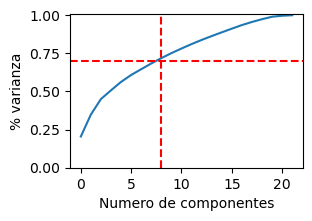

In [31]:
pca = PCA()
thefit_pca = pca.fit(X) # fitting of the PCA model 

# to select # PC's: index at which the %variance explained > 0.7
cutoff =0.7
num_PC=len(np.cumsum(thefit_pca.explained_variance_ratio_)) - sum(np.cumsum(thefit_pca.explained_variance_ratio_)>=cutoff)

plt.figure(figsize=(3, 2))

plt.plot(np.cumsum(thefit_pca.explained_variance_ratio_))
plt.axvline(x=num_PC, color='r', linestyle='--')  # Red dashed line at component 10
plt.axhline(y=cutoff, color='r', linestyle='--')  # Red dashed line at component 10
plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

### T-SNE - Bonus analysis on the data

In [52]:
tsne = TSNE(n_components=2, perplexity=20)


emb = tsne.fit_transform(X)

emb = pd.DataFrame(emb, columns=['e1', 'e2'])

emb.head()

,e1,e2
0,-8.300722,-24.396269
1,-8.300722,-24.396269
2,-8.300722,-24.396269
3,-23.682760,2.062716
4,18.625515,-56.666191


In [53]:
emb.shape, X.shape, clothes_sim.shape

((37783, 2), (37783, 22), (37783, 6))

In [89]:
## COLOR CODES MATCH THE COLOR LABEL
colors_dict = {
    'brown': '#800000',
    'red': '#FF0000',
    'yellow': '#FFFF00',
    'blue': '#0000FF',
    'beige': '#F5F5DC',
    'white': '#FFFFFF',
    'gray': '#808080',
    'purple': '#800080',
    'multicolor': '#FF00FF',  # Specifying a different color for 'multicolor'
    'orange': '#FFA500',
    'black': '#000000',
    'pink': '#FFC0CB',
    'green': '#008000',
    'turquoise': '#40E0D0',
    'gold': '#FFD700'
}

types_dict = {
    'sweater': '#FF0000',
    'sweatshirt': '#0000FF',
    'top': '#808080',
    'dress': '#FFA500',
    'tshirt': '#000000',
    'shirt': '#008000'
}

class_dict = {"low": "grey", "middle": "orange", "high":"red"}

# Map color labels to their respective color codes
clothes_sim['colour_colorcode'] = clothes_sim['colour'].map(colors_dict)
clothes_sim['type_colorcode'] = clothes_sim['type'].map(types_dict)
clothes_sim['class_colorcode'] = clothes_sim['brand_class'].map(class_dict)


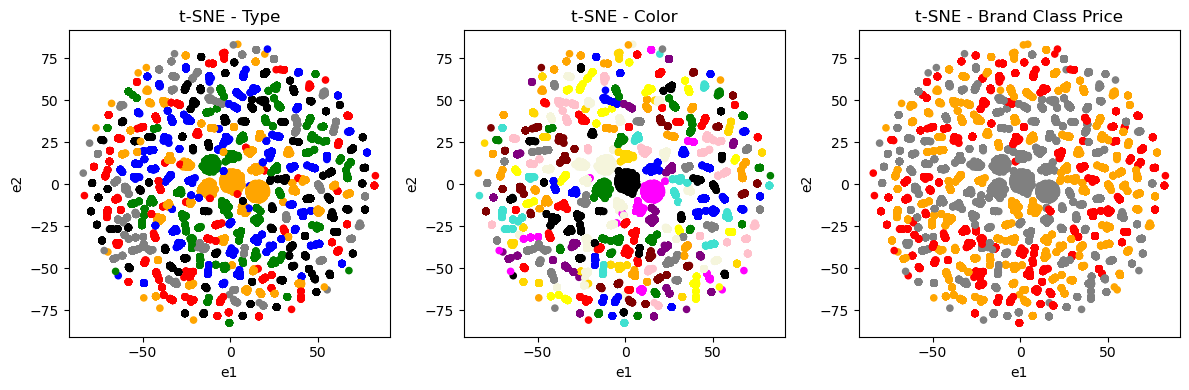

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 2 columns for side-by-side plots


# Replace 'e1' and 'e2' with the column names of the t-SNE embeddings DataFrame
e1 = emb['e1']
e2 = emb['e2']

emb.plot.scatter(x='e1', 
                 y='e2', 
                 c=clothes_sim['type_colorcode'], ax=axes[0])
axes[0].set_title('t-SNE - Type')

emb.plot.scatter(x='e1', 
                 y='e2', 
                 c=clothes_sim['colour_colorcode'], ax=axes[1])
axes[1].set_title('t-SNE - Color')

emb.plot.scatter(x='e1', 
                 y='e2', 
                 c=clothes_sim['class_colorcode'], ax=axes[2])
axes[2].set_title('t-SNE - Brand Class Price')

plt.tight_layout()
plt.show()

### Hyperparameter tuning -  Grid search and Random Grid search

In [14]:
import warnings
warnings.simplefilter('ignore')

import numpy as np


from sklearn.datasets import make_circles, make_regression

from sklearn.model_selection import train_test_split as tts


from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.model_selection import GridSearchCV        # por fuerza bruta

###  grid with random forest

In [15]:
modelo = RandomForestRegressor()

modelo.fit(X_train, y_train)

#R2
train_score=modelo.score(X_train, y_train)
test_score=modelo.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)

Train:  0.4283828163124389
Test:  0.4212764295052547


In [16]:
params = {'n_estimators': [10, 20, 50, 100, 150, 200, 500],
          'max_depth': [5, 10, 20, 25]}

In [19]:
def grid(modelo, params):

    g = GridSearchCV(modelo,     # modelo de ML de sklearn
                     params,     # dictio de params a probar
                     cv=5,       # cv=cross-validation
                     return_train_score=True,   # error de entrenamiento
                    )


    g.fit(X, y)

    # ajuste de todos los modelos y combinaciones
    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))


    return g.best_estimator_.fit(X_train, y_train)

In [20]:
%%time

modelo_grid = grid(RandomForestRegressor(), params)

Acierto test: 0.44
Acierto train: 0.42
Mejores parametros: {'max_depth': 10, 'n_estimators': 150}
Mejor acierto cv: 0.38
CPU times: user 7min 15s, sys: 2.73 s, total: 7min 18s
Wall time: 7min 20s


In [24]:
modelo = RandomForestRegressor(max_depth=10, n_estimators=150)

modelo.fit(X_train, y_train)

#R2
train_score=modelo.score(X_train, y_train)
test_score=modelo.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)

y_pred = modelo.predict(X_test)
mse(y_test, y_pred, squared=False) 

Train:  0.42313259043977014
Test:  0.4273325647289168


18.04137134201087